In [399]:
import pandas as pd 
import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm

import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [400]:
#Loading Data
#Data 
table_d = pd.read_csv('onlinefoods.csv')

# Dropped Unnamed: 12
table_d.drop('Unnamed: 12',axis = 1 , inplace = True)

print("The Head Of Dataset is:")
table_d.head()

The Head Of Dataset is:


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [401]:
print("The Shape Of Dataset is:")
table_d.shape

The Shape Of Dataset is:


(388, 12)

In [402]:
print("The Info Of Dataset is:")
table_d.info()

The Info Of Dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [403]:
print("The Percent Missing Of Dataset is:")
percent_missing = round(100*(table_d.isnull().sum())/len(table_d), 2)
percent_missing

The Percent Missing Of Dataset is:


Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
dtype: float64

In [404]:
print("The Numerical Summary Of Dataset is:")
table_d.describe()

The Numerical Summary Of Dataset is:


,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [405]:
print("The Null Values Of Dataset is:")
table_d.isnull().sum()

The Null Values Of Dataset is:


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [406]:
print("The Duplivate Values Of Dataset is:")
table_d.duplicated().sum()

The Duplivate Values Of Dataset is:


103

In [407]:
# Drop Duplicates 
table_d.drop_duplicates(inplace=True)

print("The Duplivate Values Of Dataset after drop is:")
table_d.duplicated().sum()

The Duplivate Values Of Dataset after drop is:


0

In [408]:
def single_plot_distribution(column, data):
    print("Count of each category in", column, ":")
    print(data[column].value_counts())
    
    # Plot distribution chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title('Count of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Plot pie chart
    plt.subplot(1, 2, 2)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
    plt.title('Distribution of ' + column)
    plt.ylabel('')  # Remove y-label
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

Count of each category in Age :
Age
23    47
25    41
22    40
24    37
26    27
21    18
27    16
28    12
32    12
30     8
20     7
31     7
29     7
19     4
18     1
33     1
Name: count, dtype: int64


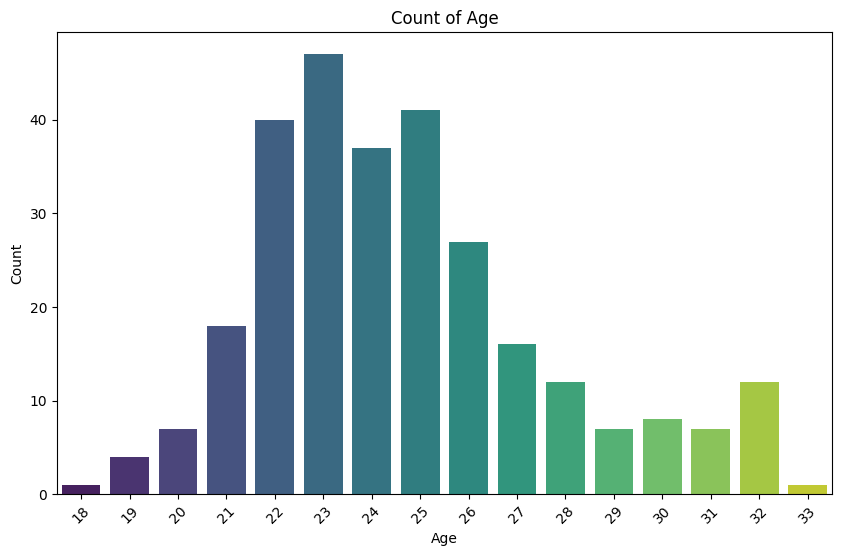

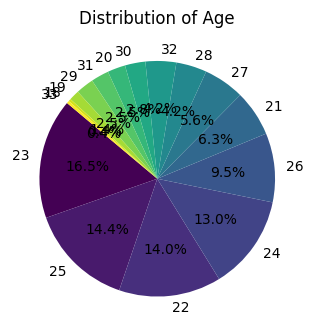

In [409]:
single_plot_distribution('Age',table_d)

Count of each category in Gender :
Gender
Male      164
Female    121
Name: count, dtype: int64


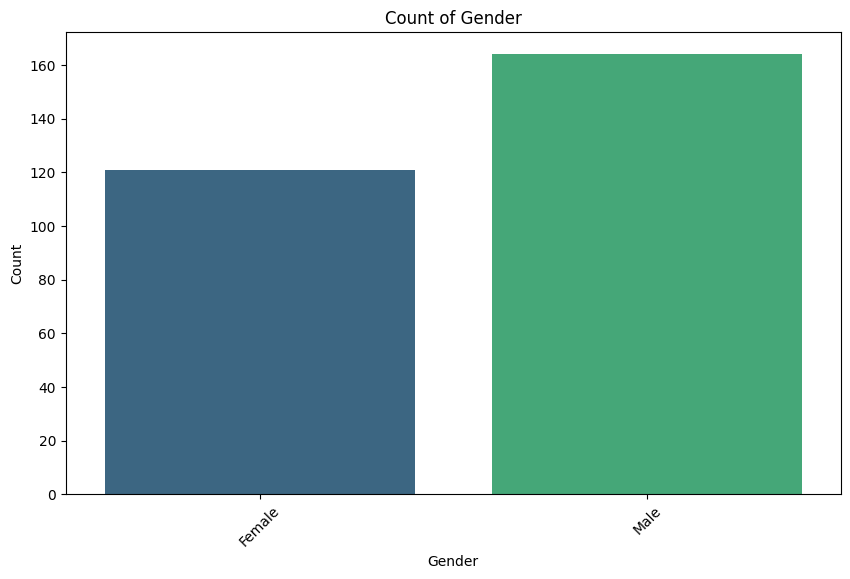

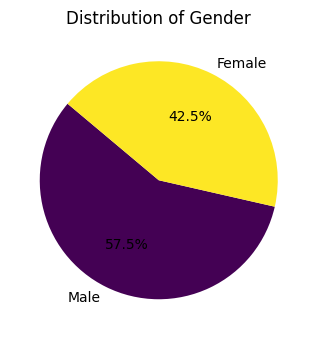

In [410]:
single_plot_distribution('Gender',table_d)

Count of each category in Marital Status :
Marital Status
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64


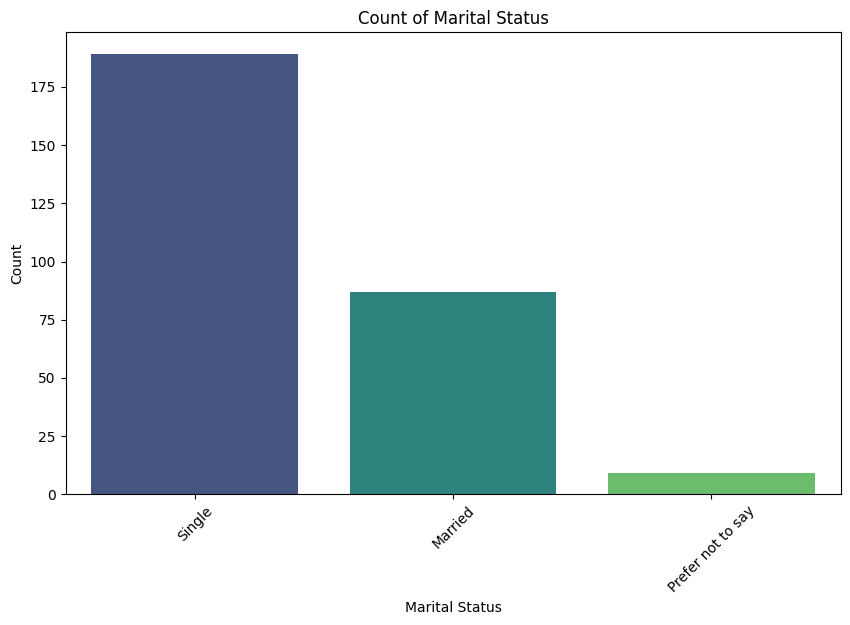

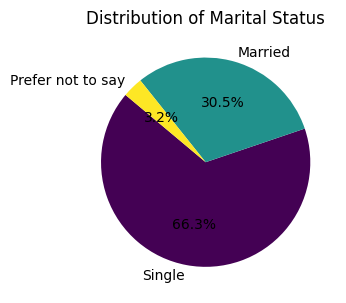

In [411]:
single_plot_distribution('Marital Status',table_d)

Count of each category in Occupation :
Occupation
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64


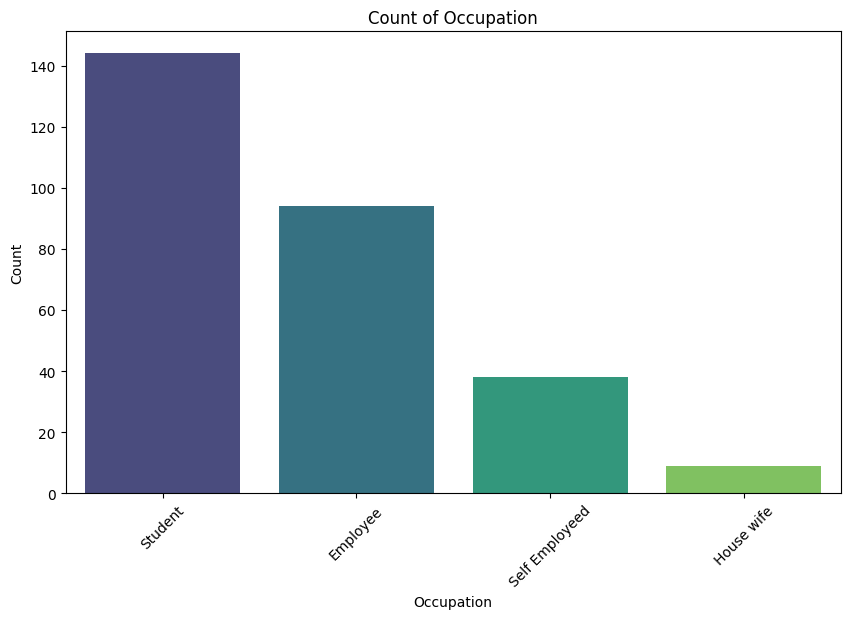

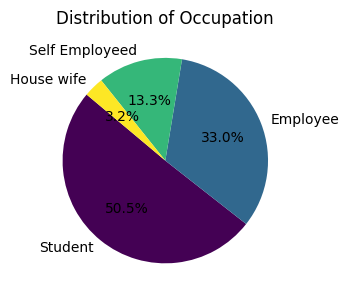

In [412]:
single_plot_distribution('Occupation',table_d)

Count of each category in Monthly Income :
Monthly Income
No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: count, dtype: int64


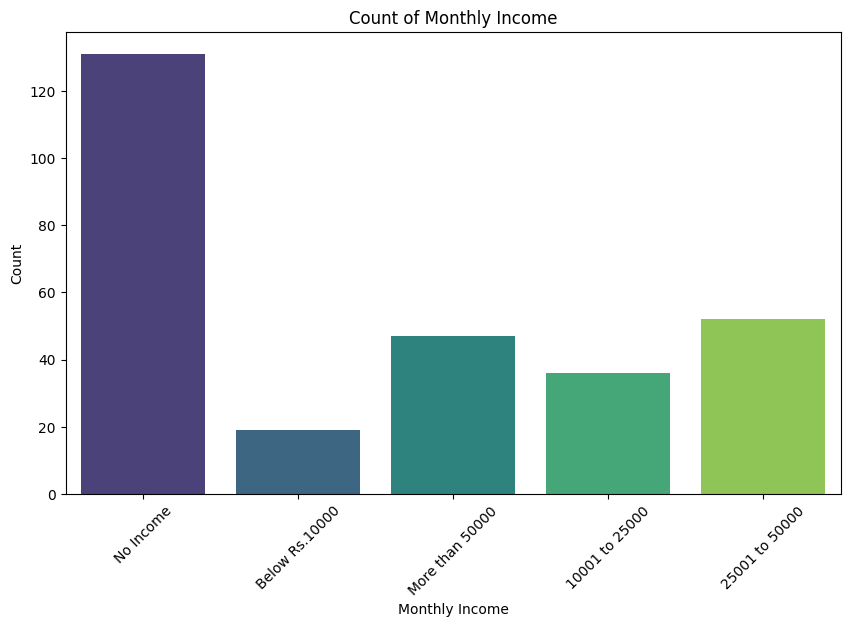

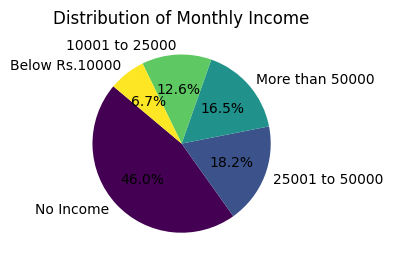

In [413]:
single_plot_distribution('Monthly Income',table_d)

Count of each category in Educational Qualifications :
Educational Qualifications
Graduate         126
Post Graduate    125
Ph.D              21
School            11
Uneducated         2
Name: count, dtype: int64


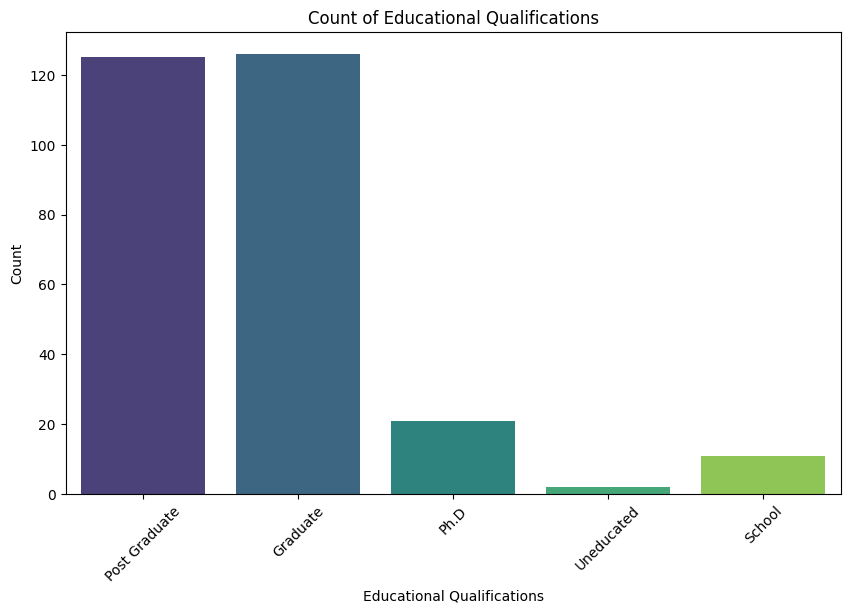

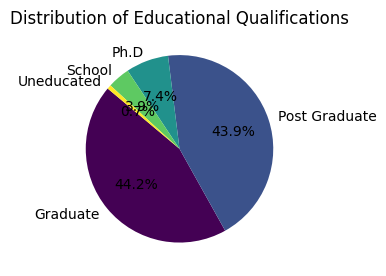

In [414]:
single_plot_distribution('Educational Qualifications',table_d)

Count of each category in Family size :
Family size
3    87
2    75
4    45
5    37
6    23
1    18
Name: count, dtype: int64


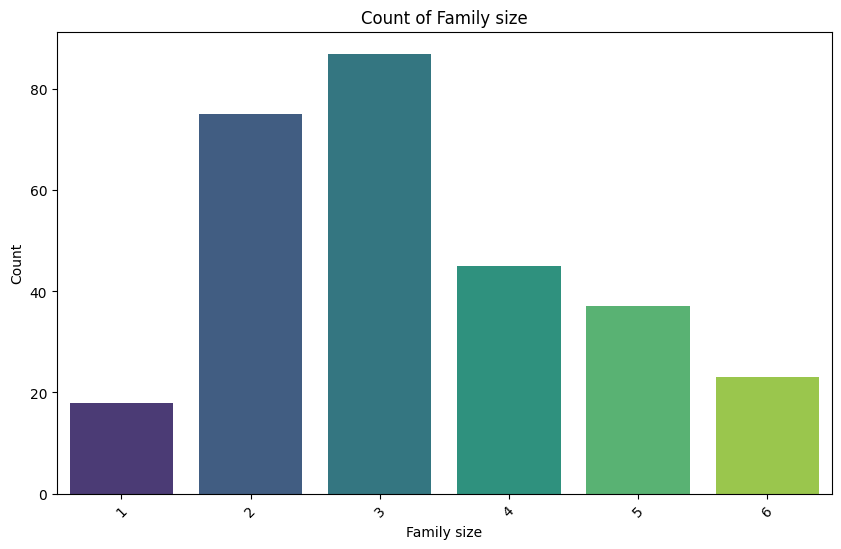

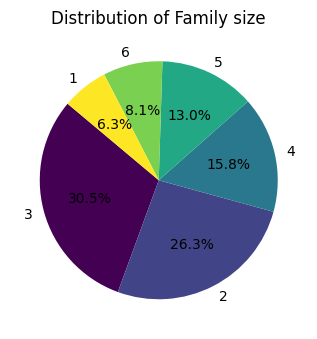

In [415]:
single_plot_distribution('Family size',table_d)

Count of each category in Output :
Output
Yes    217
No      68
Name: count, dtype: int64


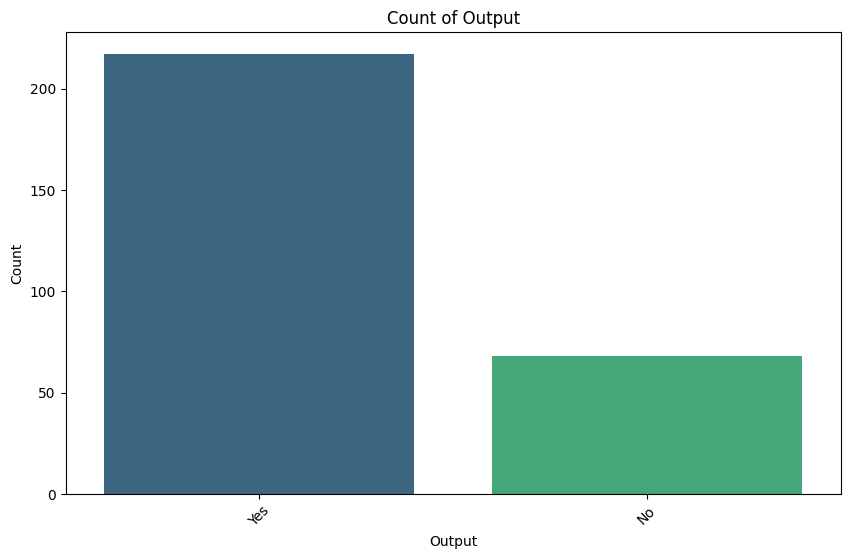

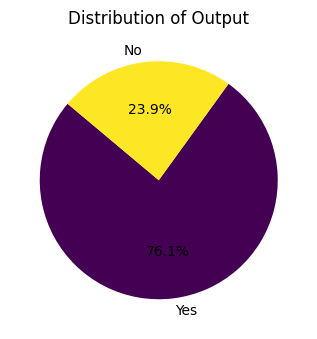

In [416]:
single_plot_distribution('Output',table_d)

Count of each category in Feedback :
Feedback
Positive     231
Negative      54
Name: count, dtype: int64


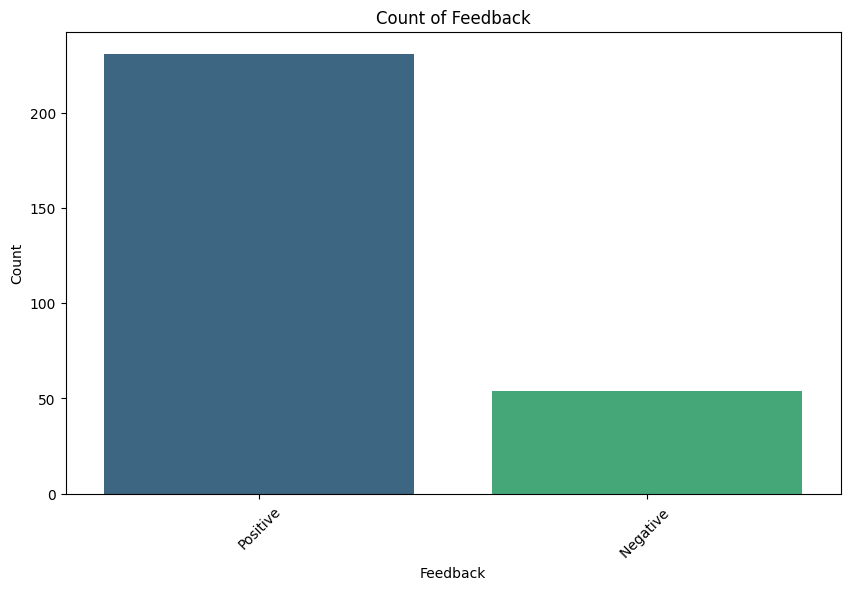

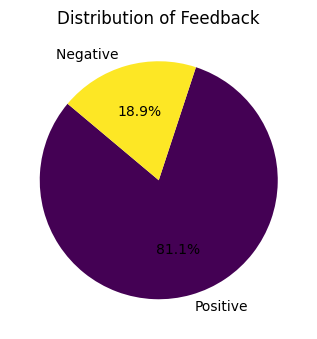

In [417]:
single_plot_distribution('Feedback',table_d)

In [418]:
#Principal Component Analysis
print("------PCA - Principal Component Analysis------")
pca_d = table_d.copy()
pca_d['Feedback'] = pca_d['Feedback'].replace({'Positive': 1, 'Negative ': 0})
pca_d['Monthly Income'] = pca_d['Monthly Income'].replace({'No Income': 0, 'Below Rs.10000': 5000, '10001 to 25000': 17500, '25001 to 50000': 37500, 'More than 50000': 50000})

------PCA - Principal Component Analysis------


Explained Variance Ratio:
[0.28089171 0.20744455 0.15488072 0.14452184 0.13765518 0.07460599]


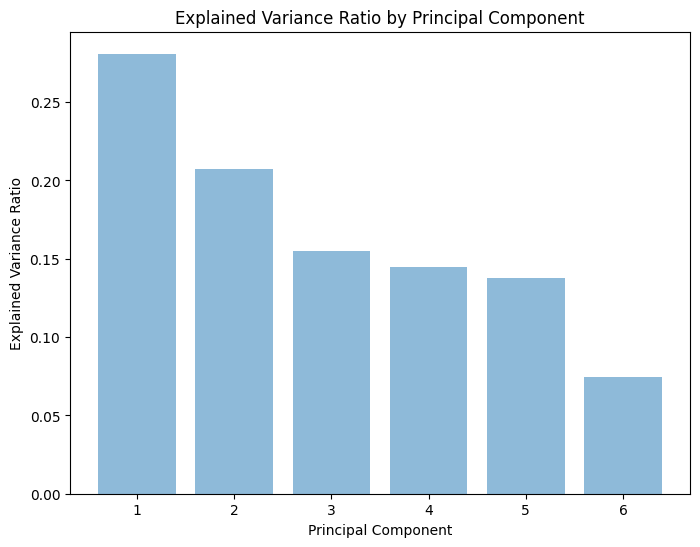

Component Loadings:
        Age  Monthly Income  Family size  latitude  longitude  Feedback
0  0.652000        0.620153     0.315114  0.019657   0.121260 -0.275533
1  0.053865       -0.061106    -0.196686  0.613145  -0.607090 -0.458447
2 -0.054068       -0.318393     0.895883 -0.002798  -0.301437  0.047157
3 -0.133737       -0.105685    -0.050727 -0.667456  -0.120489 -0.712991
4 -0.199011       -0.229146     0.170335  0.415650   0.709737 -0.449867
5  0.715248       -0.668300    -0.166805 -0.073456   0.087345  0.030772


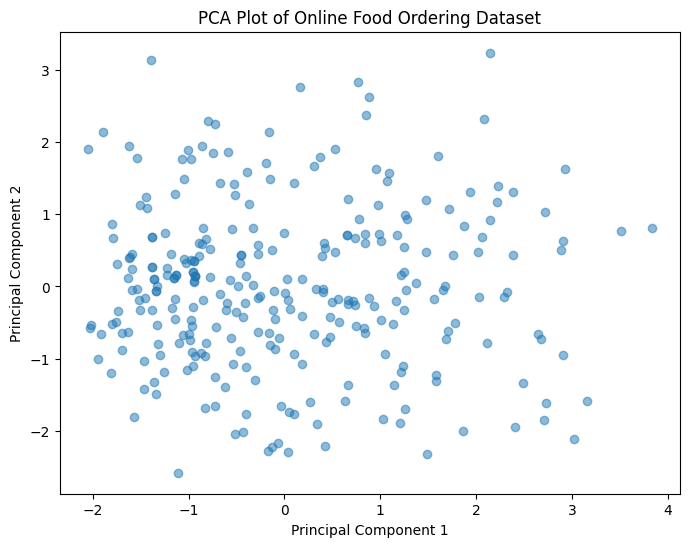

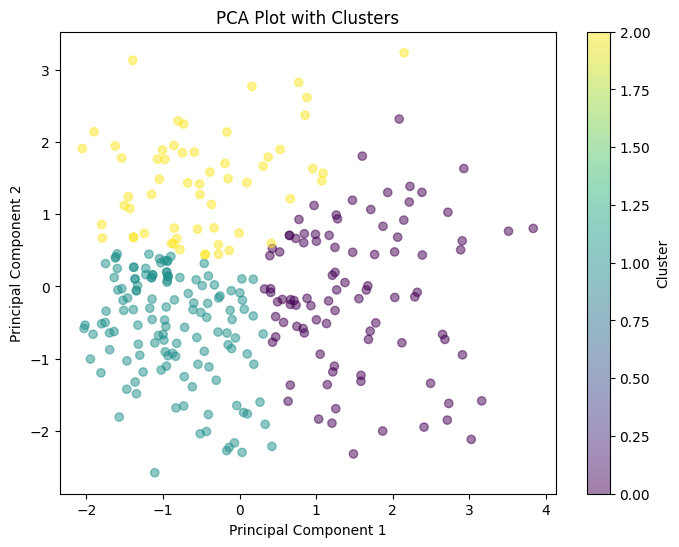

In [419]:
#Normalization
variables = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Feedback']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_d[variables])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Interpretation: Component Loadings
component_loadings = pd.DataFrame(pca.components_, columns=variables)
print("Component Loadings:")
print(component_loadings)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Online Food Ordering Dataset')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Visualize clustered data
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [420]:
multiRegression_d = pca_d.copy()

Multiple Regression


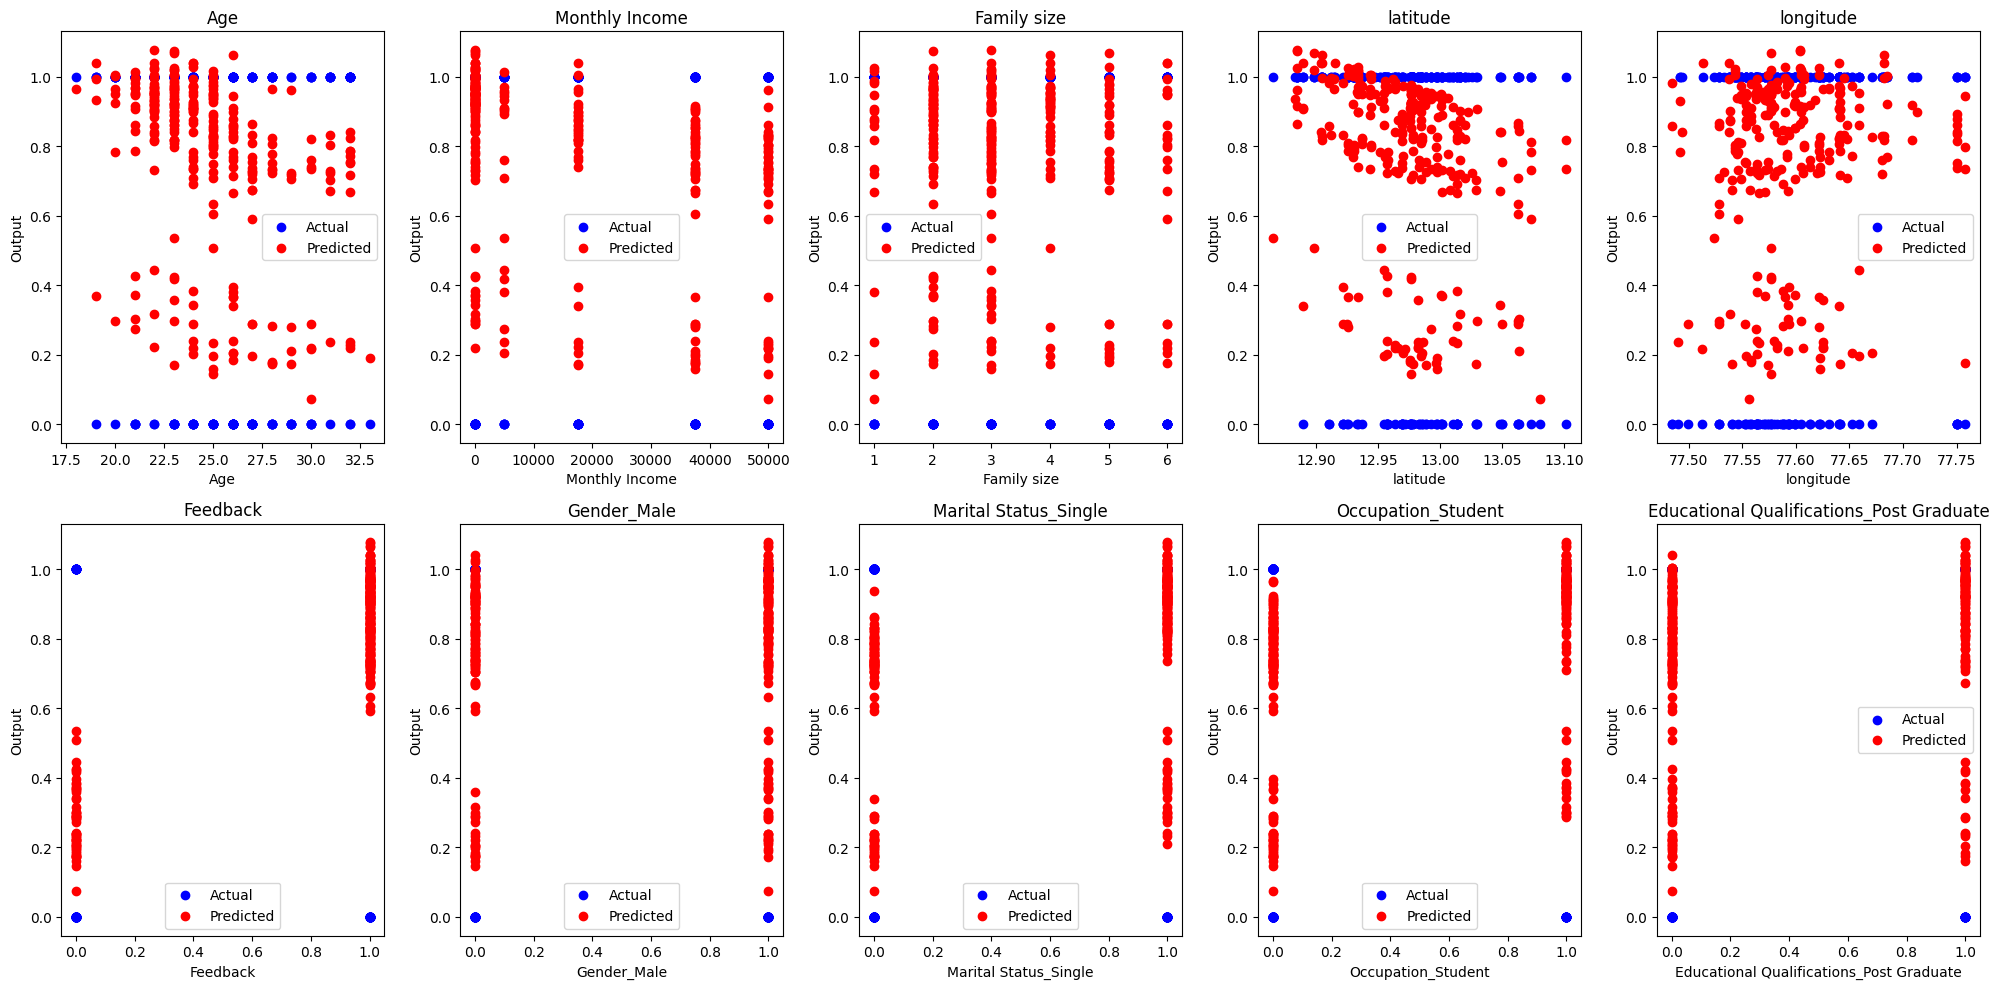

                                   Variable  Coefficient
0                                       Age     0.001499
1                            Monthly Income    -0.000001
2                               Family size     0.003155
3                                  latitude    -1.190502
4                                 longitude     0.008221
5                                  Feedback     0.541772
6                               Gender_Male     0.043875
7                     Marital Status_Single     0.097785
8                        Occupation_Student     0.060719
9  Educational Qualifications_Post Graduate     0.017415
Intercept: 14.973359265763749


In [421]:
print("Multiple Regression")
multiRegression_d = pd.get_dummies(multiRegression_d, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications'], drop_first=True)

# Define independent variables (features)
X = multiRegression_d[['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Feedback',
        'Gender_Male', 'Marital Status_Single', 'Occupation_Student', 'Educational Qualifications_Post Graduate']]

# Define dependent variable (outcome)
y = multiRegression_d['Output'].map({'Yes': 1, 'No': 0})  # Convert 'Output' to numeric

# Perform multiple linear regression
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict the values
y_predicted = regression_model.predict(X)

# Scatter plots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, column in enumerate(X.columns):
    row = i // 5
    col = i % 5
    axs[row, col].scatter(X[column], y, color='blue', label='Actual')
    axs[row, col].scatter(X[column], y_predicted, color='red', label='Predicted')
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Output')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Print coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regression_model.coef_})
print(coefficients)

# Print intercept
print('Intercept:', regression_model.intercept_)

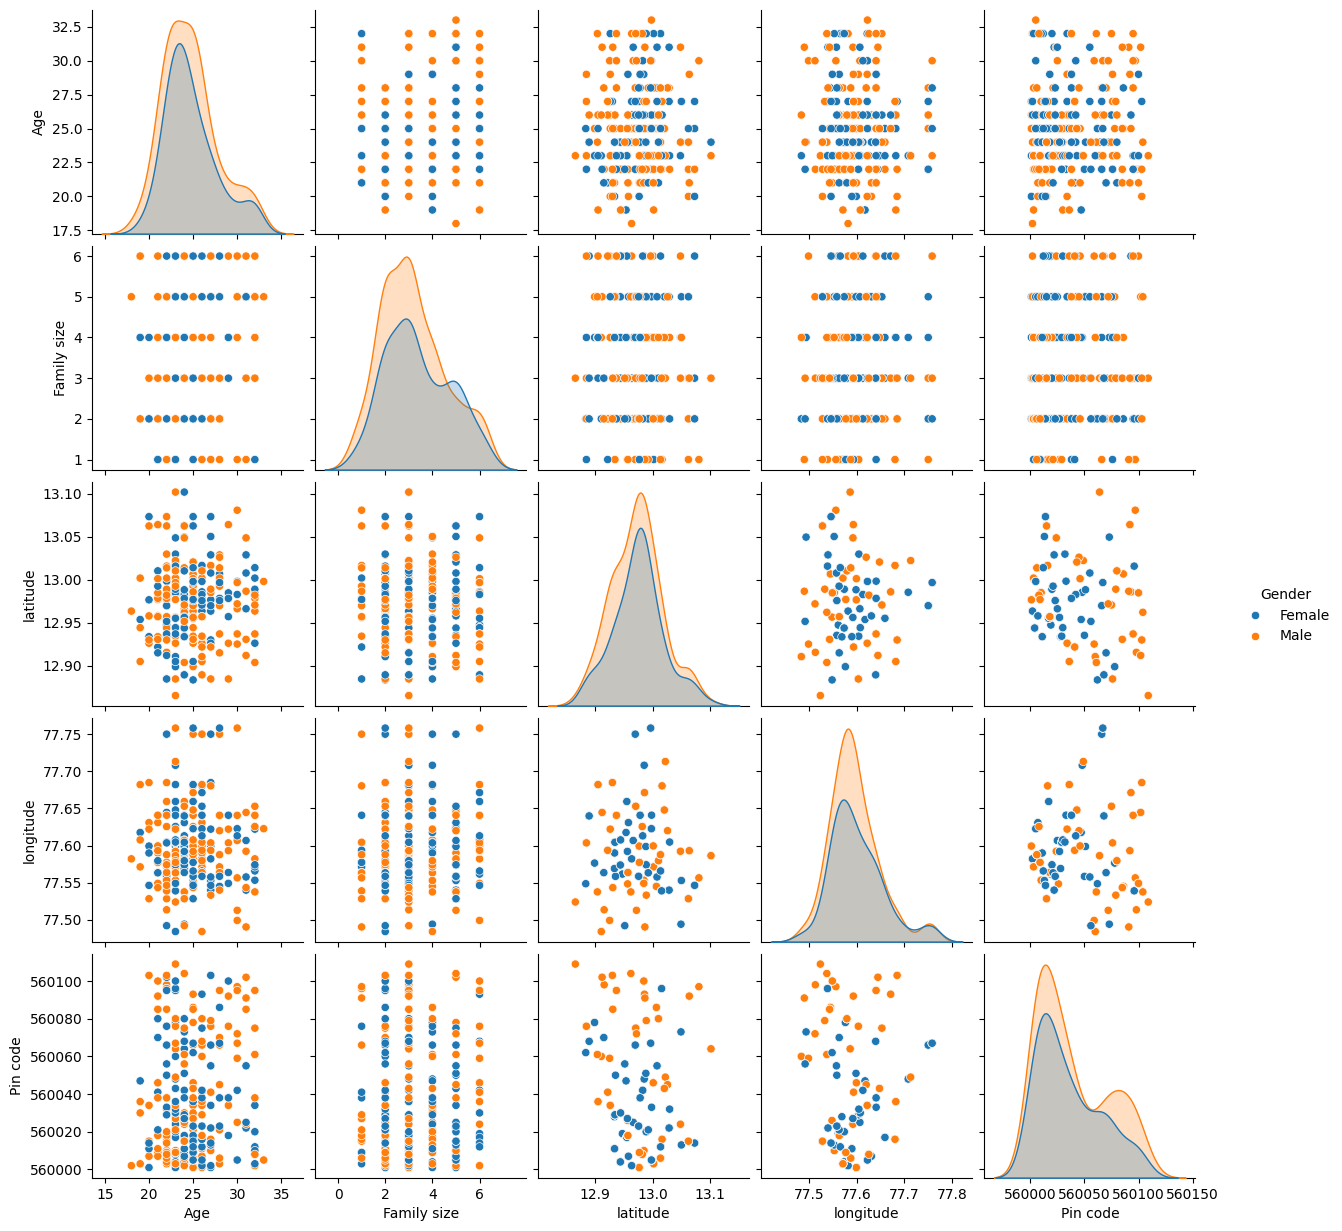

In [422]:
#Normalization
columns_to_plot =['Age','Gender','Family size', 'latitude', 'longitude','Pin code',]

data_to_plot = table_d[columns_to_plot]

sns.pairplot(data_to_plot, hue='Gender')
plt.show()

Cluster Analysis


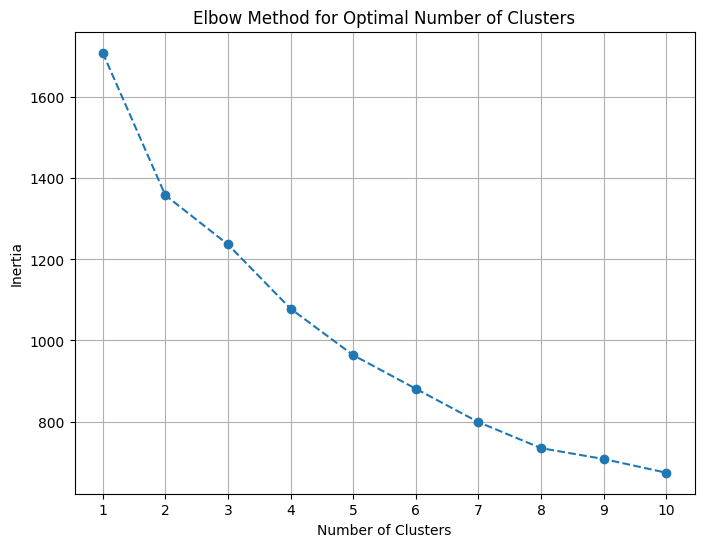

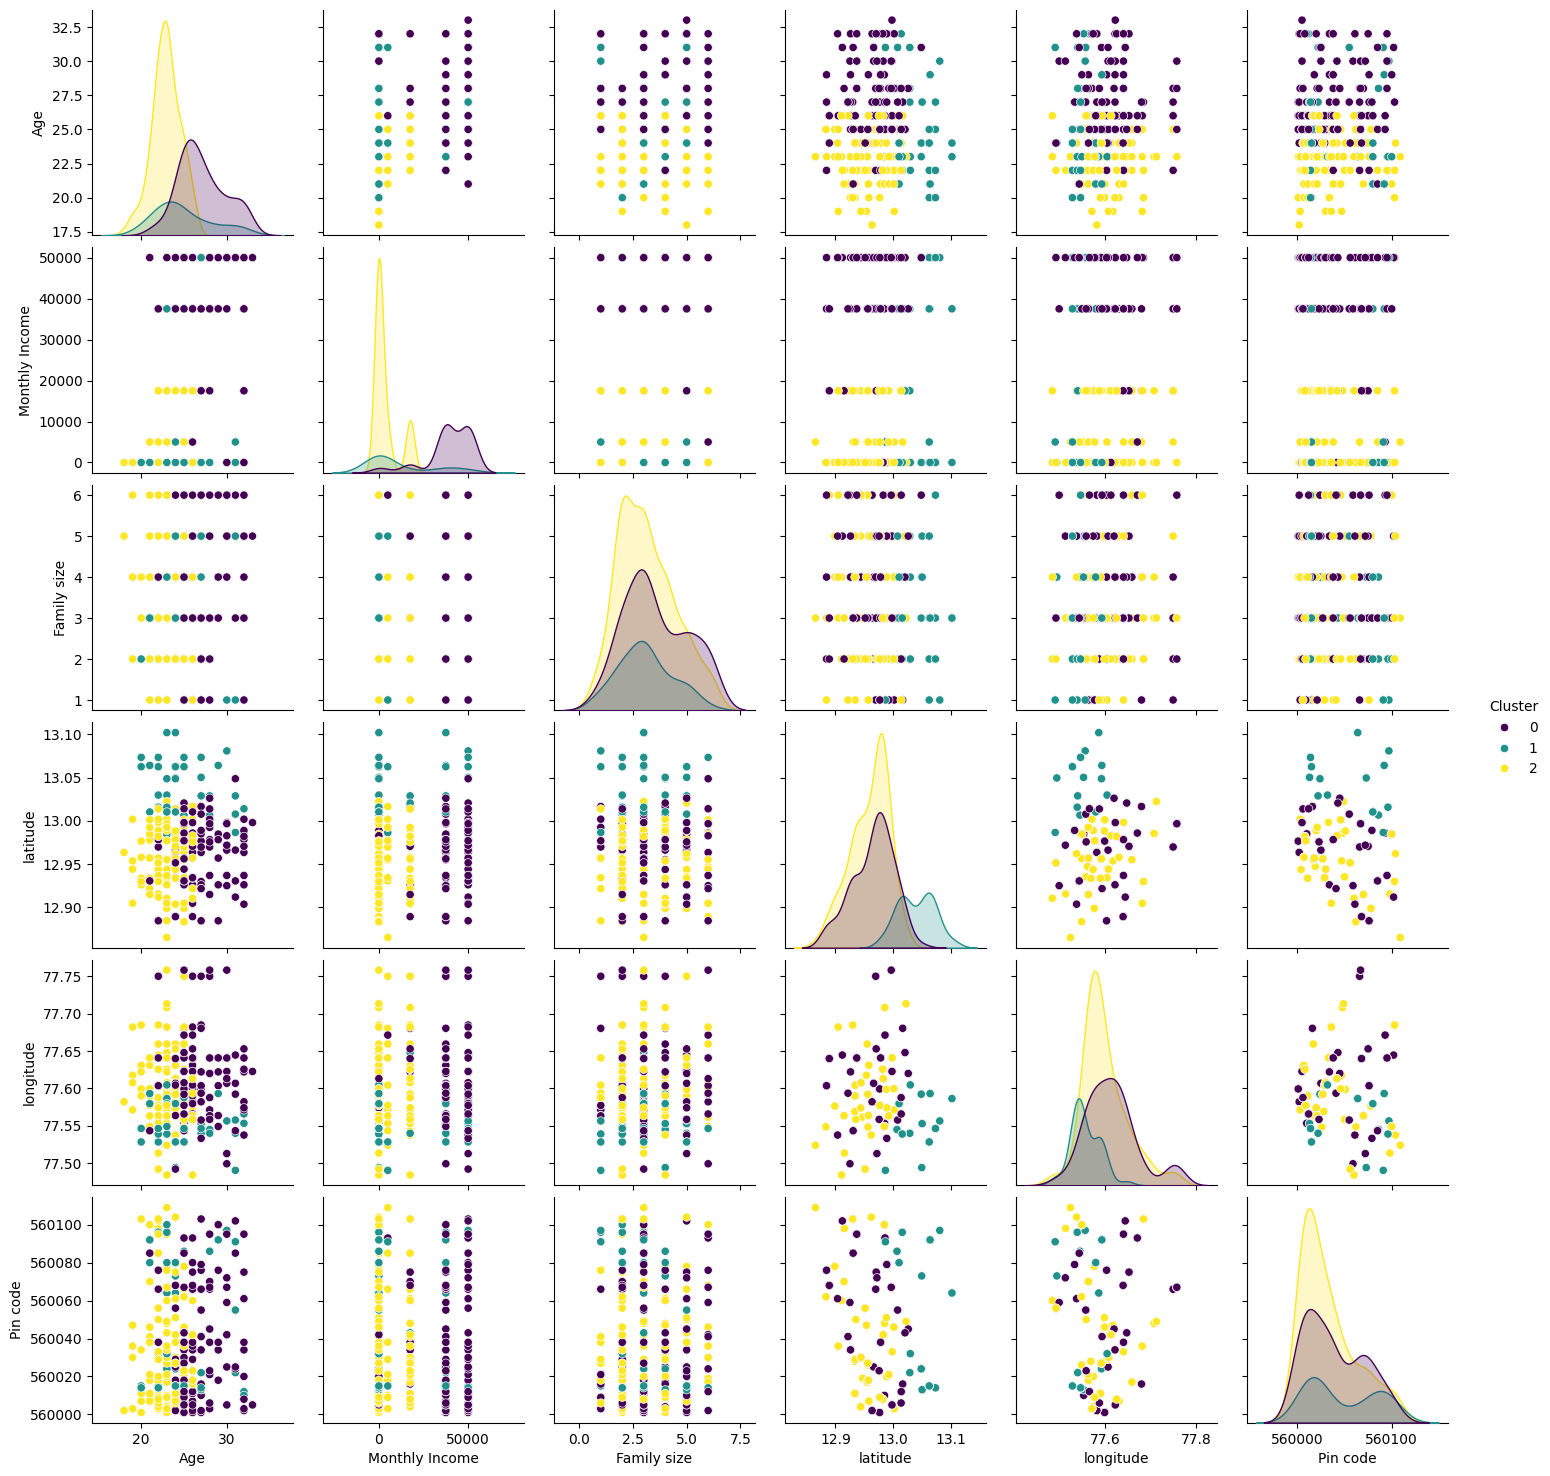

In [423]:
print("Cluster Analysis")
#Normalization
features = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_d[features])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow method, choose the optimal number of clusters
n_clusters = 3  # Adjust as needed

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_d['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
sns.pairplot(pca_d, hue='Cluster', vars=features, palette='viridis')
plt.show()

Outlier Dedection


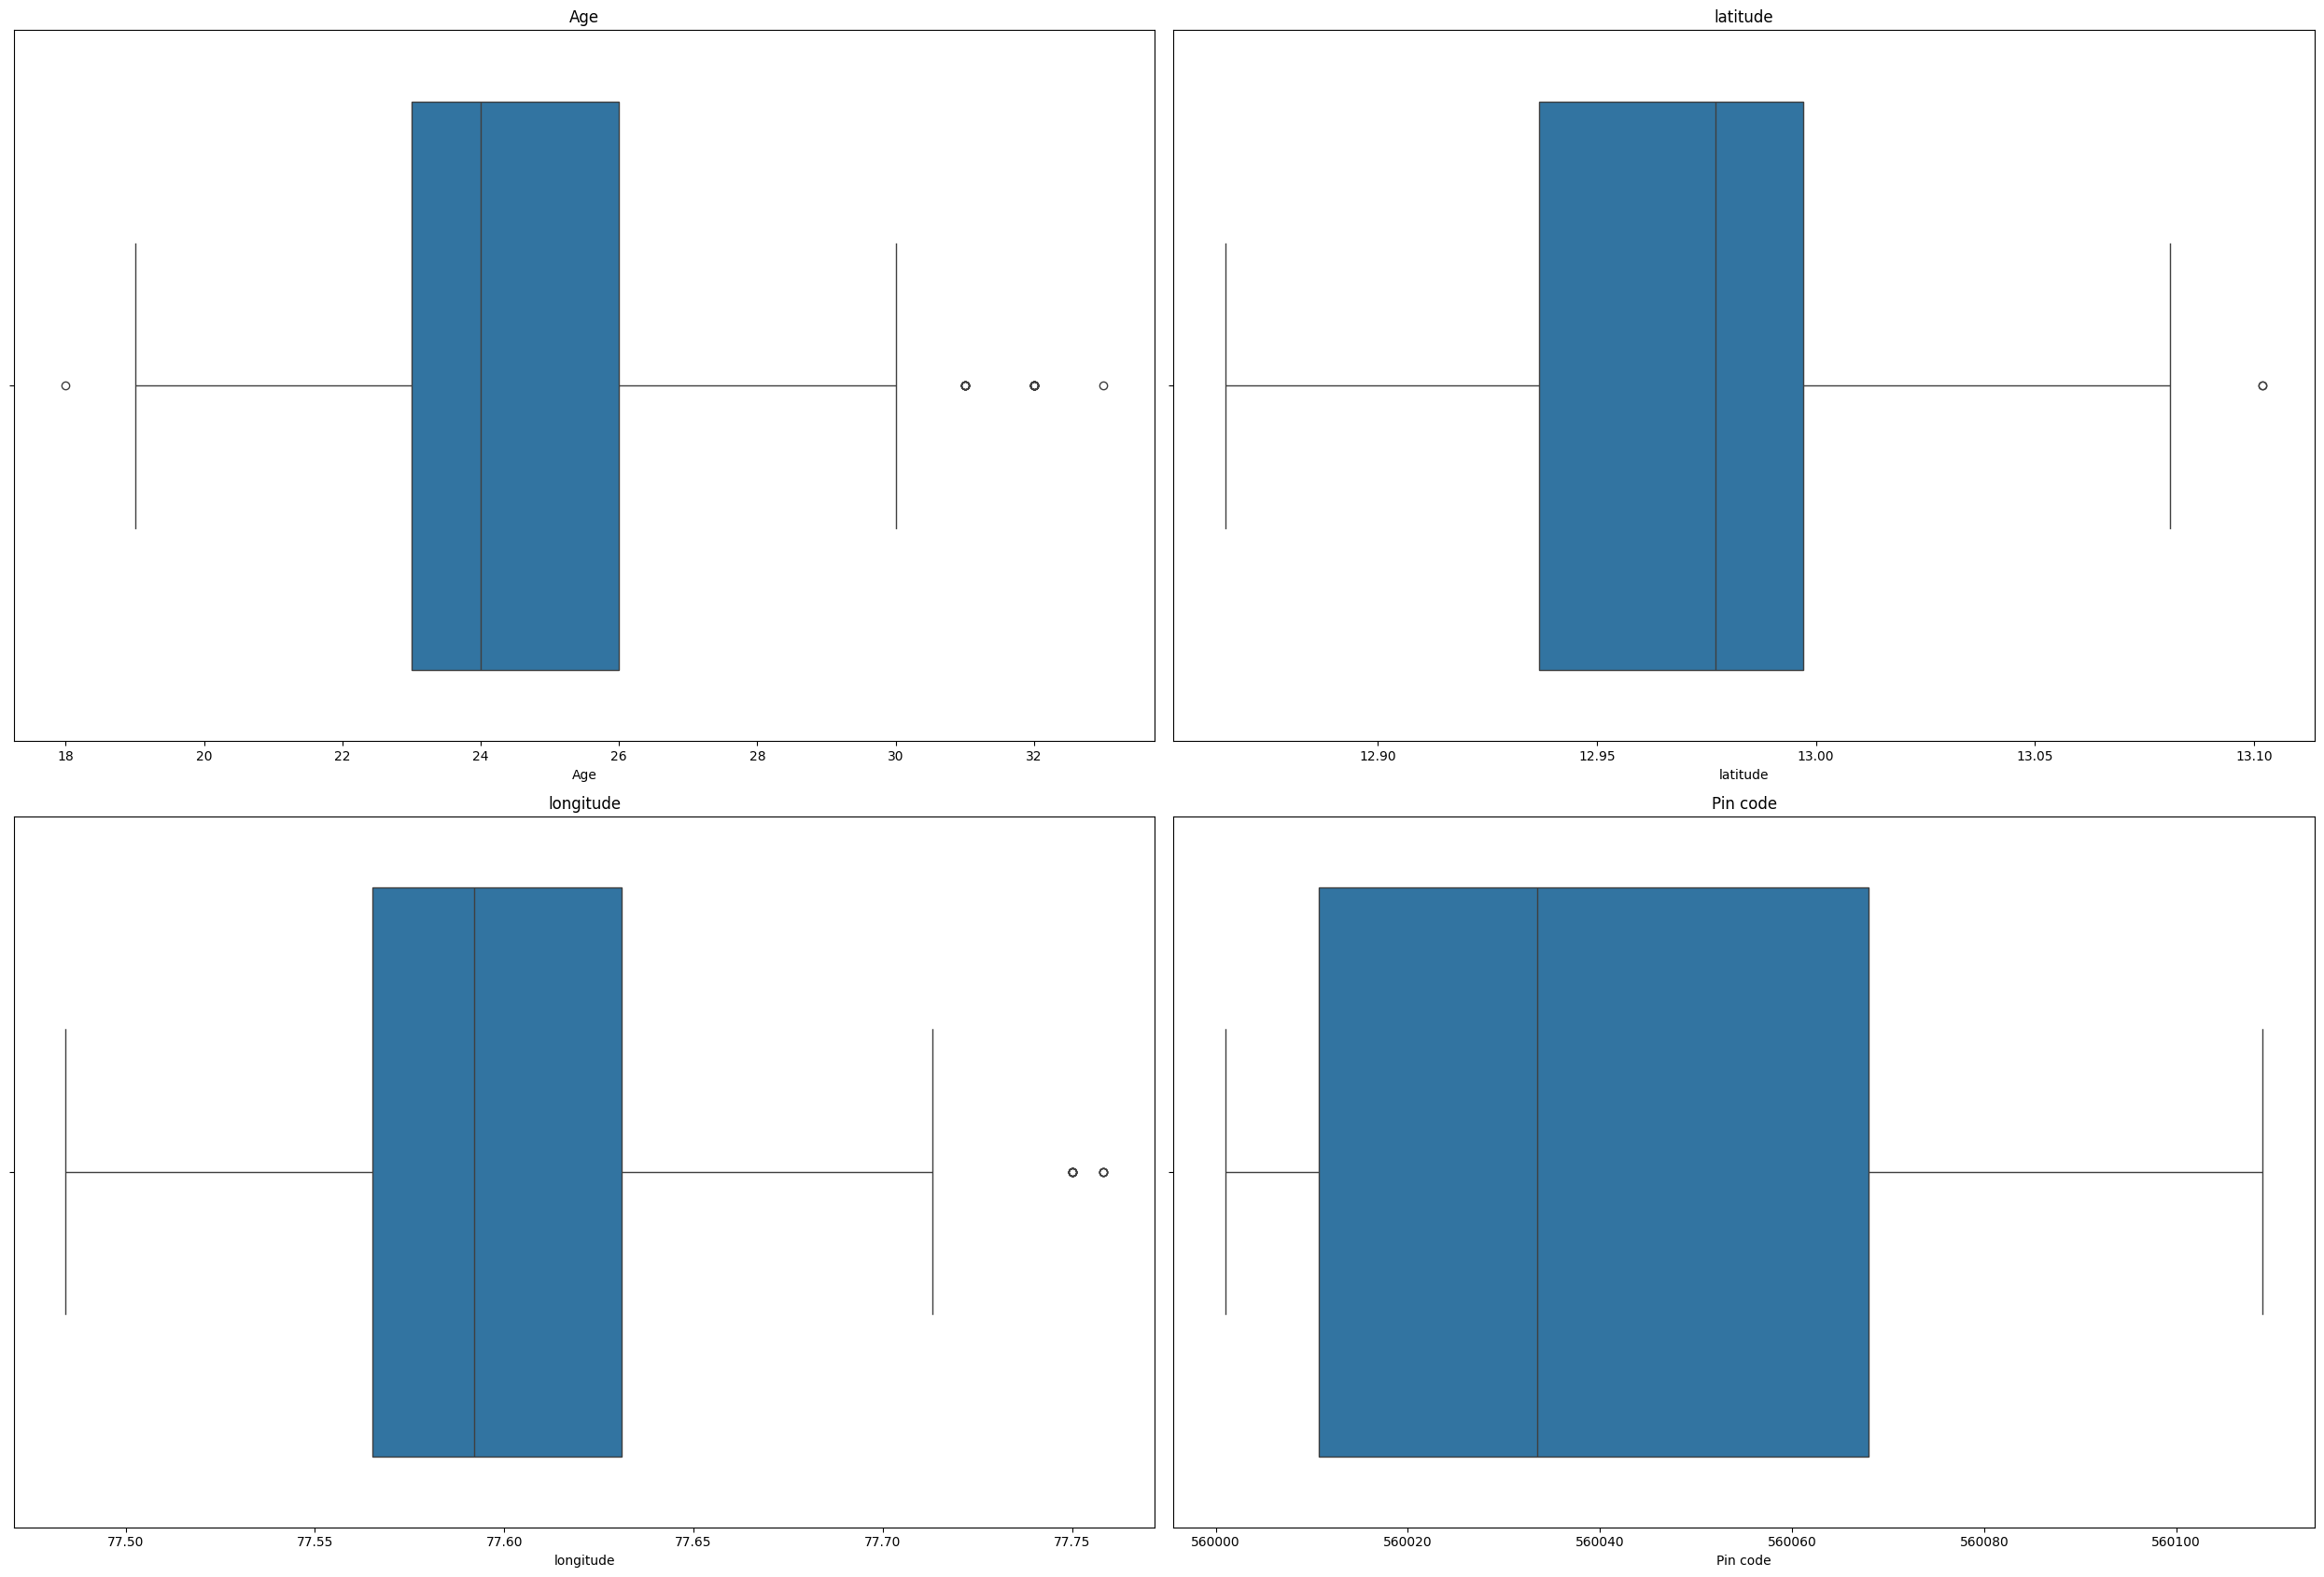

In [424]:
print("Outlier Dedection")
#Normalization
features =['Age','latitude','longitude','Pin code']

num_rows = 2  
num_cols = 2  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

axes = axes.flatten()

for i, col in enumerate(features[:num_rows * num_cols]):
    sns.boxplot(x=tr_d[col], ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [425]:
def plot_numerical_distribution_with_hue(data, numerical_cols, hue_col):
    num_cols = len(numerical_cols)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 6*num_cols))
    
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=data, x=col, hue=hue_col, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col} by {hue_col}')
    
    plt.tight_layout()
    plt.show()

Numerical Feature Distribution


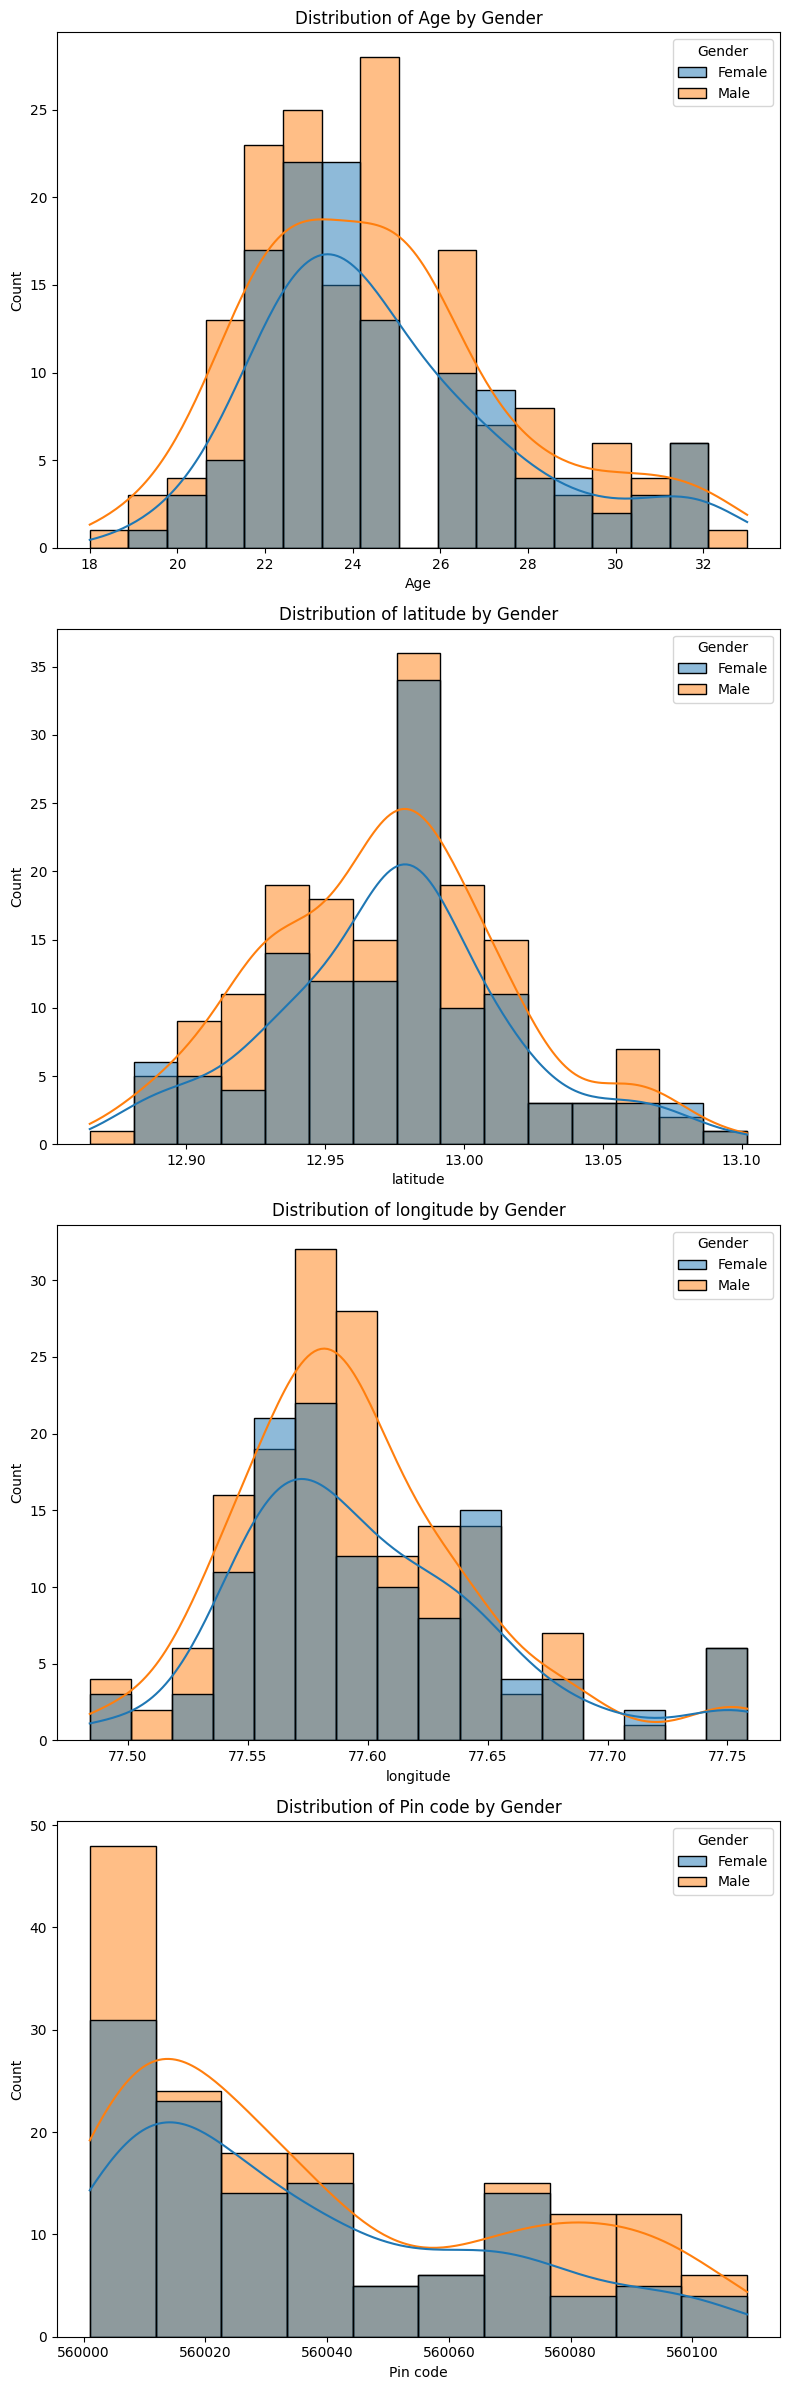

In [426]:
print("Numerical Feature Distribution")

plot_numerical_distribution_with_hue(table_d,features,'Gender')

In [427]:
print("Weighting and Aggregation")

print("Weighting and Aggregation by Gender")

table_d['Order Weight'] = table_d['Output'].apply(lambda x: 1 if x == 'Yes' else 0)

# Assign weights based on feedback sentiment
table_d['Feedback Weight'] = table_d['Feedback'].apply(lambda x: 1 if x == 'Positive' else 0)

# Aggregate data based on gender
gender_agg = table_d.groupby('Gender').agg({'Order Weight': 'sum', 'Feedback Weight': 'mean'})

print(gender_agg)

Weighting and Aggregation
Weighting and Aggregation by Gender
        Order Weight  Feedback Weight
Gender                               
Female            90         0.834711
Male             127         0.792683


In [428]:
print("Weighting and Aggregation by Age Groups")
pca_d['Age Group'] = pd.cut(pca_d['Age'], bins=[0, 30, 50, np.inf], labels=['Young Adult', 'Middle-Aged Adult', 'Senior'])

# Weighting and aggregation by age groups
age_group_stats = pca_d.groupby('Age Group').agg({
    'Monthly Income': 'mean',
    'Family size': 'mean',
    'Feedback': lambda x: (x == 1).mean()  # Calculate proportion of positive feedback
}).reset_index()

age_group_stats.columns = ['Age Group', 'Average Monthly Income', 'Average Family Size', 'Proportion of Positive Feedback']

print(age_group_stats)


Weighting and Aggregation by Age Groups
           Age Group  Average Monthly Income  Average Family Size  \
0        Young Adult            16830.188679             3.203774   
1  Middle-Aged Adult            28250.000000             4.150000   
2             Senior                     NaN                  NaN   

   Proportion of Positive Feedback  
0                         0.815094  
1                         0.750000  
2                              NaN  


In [430]:
print("Weighting and Aggregation by Geographic Location")

def get_location_region(latitude, longitude):
    if latitude > 12.97 and longitude < 77.60:
        return 'Region A'
    elif 12.96 <= latitude <= 12.98 and 77.55 <= longitude <= 77.66:
        return 'Region B'
    else:
        return 'Other Region'

pca_d['Location Region'] = pca_d.apply(lambda x: get_location_region(x['latitude'], x['longitude']), axis=1)

# Weighting and aggregation by geographic location
location_stats = pca_d.groupby('Location Region').agg({
    'Monthly Income': 'mean',
    'Family size': 'mean',
    'Feedback': lambda x: (x == 1).mean()  # pca_d set the feedback to 1 and 0 instead positive and negative, so x==1 instead x == 'Positive'
}).reset_index()

# Renaming columns for clarity
location_stats.columns = ['Location Region', 'Average Monthly Income', 'Average Family Size', 'Proportion of Positive Feedback']

print(location_stats)

Weighting and Aggregation by Geographic Location
  Location Region  Average Monthly Income  Average Family Size  \
0    Other Region            18544.520548             3.383562   
1        Region A            14568.965517             3.086207   
2        Region B            27282.608696             3.478261   

   Proportion of Positive Feedback  
0                         0.835616  
1                         0.784483  
2                         0.782609  


In [432]:
print("Weighting and Aggregation by Educational Qualifications")
edu_stats = pca_d.groupby('Educational Qualifications').agg({
    'Monthly Income': 'mean',
    'Feedback': lambda x: (x == 1).mean()  # pca_d set the feedback to 1 and 0 instead positive and negative, so x==1 instead x == 'Positive'
}).reset_index()

# Renaming columns for clarity
edu_stats.columns = ['Educational Qualifications', 'Average Monthly Income', 'Proportion of Positive Feedback']

print(edu_stats)

Weighting and Aggregation by Educational Qualifications
  Educational Qualifications  Average Monthly Income  \
0                   Graduate            18174.603175   
1                       Ph.D            34047.619048   
2              Post Graduate            13980.000000   
3                     School            20227.272727   
4                 Uneducated            25000.000000   

   Proportion of Positive Feedback  
0                         0.769841  
1                         0.761905  
2                         0.872000  
3                         0.727273  
4                         0.500000  


In [436]:
print("Weighting and Aggregation by Monthly Income")
income_stats = table_d.groupby('Monthly Income').agg({
    'Age': 'mean',
    'Feedback': lambda x: (x == 'Positive').mean()  # Calculate proportion of positive feedback
}).reset_index()

# Renaming columns for clarity
income_stats.columns = ['Income Level', 'Average Age', 'Proportion of Positive Feedback']

print(income_stats)

      Income Level  Average Age  Proportion of Positive Feedback
0   10001 to 25000    24.722222                         0.805556
1   25001 to 50000    26.211538                         0.730769
2   Below Rs.10000    23.736842                         0.631579
3  More than 50000    27.319149                         0.765957
4        No Income    23.244275                         0.885496


In [438]:
print("Weighting and Aggregation by Monthly Income")
occupation_stats = table_d.groupby('Occupation').agg({
    'Age': 'mean',
    'Feedback': lambda x: (x == 'Positive').mean()  # Calculate proportion of positive feedback
}).reset_index()

# Renaming columns for clarity
occupation_stats.columns = ['Occupation', 'Average Age', 'Proportion of Positive Feedback']

print(occupation_stats)

Weighting and Aggregation by Monthly Income
       Occupation  Average Age  Proportion of Positive Feedback
0        Employee    26.308511                         0.734043
1      House wife    30.333333                         0.888889
2  Self Employeed    26.447368                         0.710526
3         Student    22.791667                         0.881944
